
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Attributes

>**About dataset**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.  

> **Dataset Features:** The variables featured in the dataset which are 14 in number are as outlined as follows:

> 1.) ***PatientId:*** The identification of the patient

> 2.) ***AppointmentID:*** The identification of each appointment

> 3.) ***Gender:*** Male or Female . Female is the greater proportion, woman takes way more care of they health in                         comparison to man.
  
> 4.) ***Age:*** The age of the patient.

> 5.) ***Hipertension:*** True or False which has been translated into 0 for False and 1 for True.

> 6.) ***Diabetes:*** True or False which has been translated into 0 for False and 1 for True.

> 7.) ***Alcoholism:*** True or False which has been translated into 0 for False and 1 for True.

> 9.) ***Handcap:*** True or False which has been translated into 0 for False and 1 for True.

>10.) ***ScheduledDay:*** tells us on what day the patient set up their appointment.

>11.) ***Neighborhood:*** indicates the location of the hospital. 

>12.) ***AppointmentDay:*** indicates the actual day of the appointment.

>13.) ***Scholarship:*** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família hear https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia.

>14.) ***No-show:*** This indicates wether or not a patient shows up for their appointmnet. It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up .



### Question(s) for Analysis
>Some questions we would like to answer are as follows:

>**Question:** What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? We are going to break this questions into components.
 
>(a) Do people with at least one of these characteristics like Hypertension, Diabetes, Alcoholism, Handicap, scholarship, sms_recieved likely to show up more ?

>(b) Does gender determine if a person will show up or not? And if women with alcoholism is likely to show up for and appointment than men.

>Before exploring the dataset to answer the above questions, the data set will be reviewed, cleaned (that is check for missing values, duplicate values, incorrect datatypes, incorrect data value and so on.), statistical operations will be performed to get more insight on the dataset, and some visualizations like histograms and barplots will be used to see the distributions of the dataset.

With these questions in mind, we proceed to load in our data.

We import numpy and pandas for numerical manupulation of the data, and matplotlib for visualizing the data. 

In [258]:
#Importing all the relevant libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, the data will loaded, checked for cleanliness, and then trim and clean the dataset for analysis. This section will be divided into two parts. (i) General Properties and (ii) Data cleaning

### General Properties
>In this part, we will explore the data with respect to the shape, the datatypes of the various variables, the statistical summaries of the variables, check out missing data and duplicated data.

In [259]:
#We first load the data, then view and inspect the first few lines
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Having viewed the first few lines of the data, we check the shape, check for duplicates,missing data, description of the data and incorrect datatypes. 

In [260]:
#Shape of the data (Numbers of rows and columns)
Shape=df.shape
print("The dataset contains",Shape[0], "samples (rows) and ", Shape[1], "observations (columns)")

The dataset contains 110527 samples (rows) and  14 observations (columns)


In [261]:
#checking for duplicated values
Dup=df.duplicated().sum()
print("The dataset contains", Dup, "duplicated values")

The dataset contains 0 duplicated values


In [262]:
#Checking for missing values
Missing=df.isna().sum().any()
if Missing==False:
    print("This dataset contains no missing values")
else:
    print("This dataset contains some missing values")

This dataset contains no missing values


In [263]:
#Checking information of the data and incorrect datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [264]:
#Checking the statistical summary of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


##### Observation
> ***Missing, duplicates, shape and datatypes:*** We have seen that the dataset has no missing values or duplicated values. The dataset contains 110527 samples (rows) and  14 observations (columns). The dataset contains float64(1), int64(8), objector string (5).

>***Areas to clean:*** We can observe from the information above that the appointment day and Scheduled day which is data and time indicator is in the string datatype instead of datetime type. Observation from the statistical description of the date shows the minimum Age to be -1 which which is quite odd, because a person's age cannot be -1. Hence we refer this entry as an error.
The datatype for the Patient Id number and the AppointmentID should be string, as the numbers are means of identifications and cannot be used in any numerical manipulations. In addition, the labeling name format for the last column "No-show" needs to be change to "No_show" for consistency.

### Data Cleaning Phase

>In this phase we will perform three major cleaning which are:

>(a) Conversion of Appointment day and Scheduled day from string datatype to datetime datatype. 

>(b) Conversion of the datatype for Patient Id number and AppointmentID to string.

>(c) Addressing the negative "Age" value.

>(d) The re-labeling of the last column "No-show"  to "No_show" for consistency.

In [265]:
# (a) Conversion of Appointment day and Scheduled day from string datatype to datetime datatype
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [266]:
#(b) Conversion of the datatype for Patient Id number and AppointmentID to string
df['PatientId'] = df['PatientId'].astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


 >From the above, the two features, Appointmentday and Scheduled day is now in a datetime format.
Now we proceed to inspect the description statistics of the dataset.

To address the negaitive Age value, we check for how many instances of such error entries are in the data set.

In [267]:
#Instances of Age of -1 in the data set
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293.0,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [268]:
#Drop the role with incorrect data value and saving it to df_1
df_1=df.drop(99832)

In [269]:
#df_1 does not contain a negative age value as will be seen in the statistical decription of ds_1
df_1.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [270]:
# (d) The re-labeling of the last column "No-show" to "No_show" for consistency.
df_1=df_1.rename(columns={"No-show":"No_show"})
df_1.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

>Now that we have trimmed and cleaned the data, we are ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we have posed in the Introduction section. We will compute statistics like:


> 1.)  Next we investigate the average, standard deviation maximum and minumum age of the patient gender

>2.)  Next we investigate the average, standard deviation maximum and minumum age of the patient with Hypertension, dieabetes, Alcoholism and Handicapped

>3.) Categorize the ages of the patient and see the distributions


> Further more, we shall basically make use of Histogram and Barplots to gain a visual understanding in this exploration analysis. 

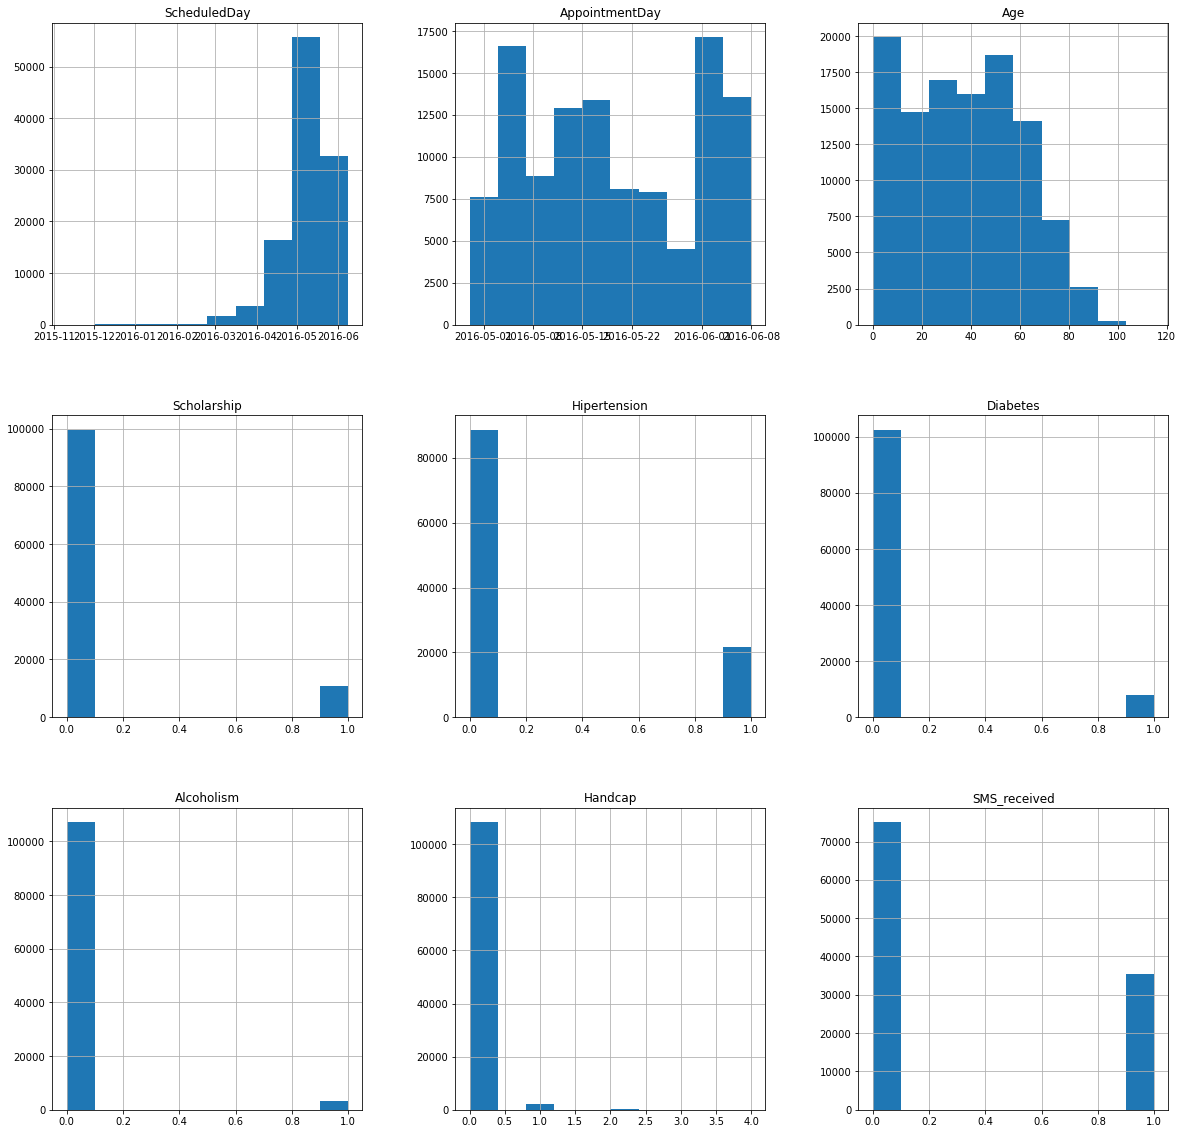

In [271]:
#Distributions of the numerical features
df_1.hist(figsize=(20, 20));

For since we will majorly make use of historgram and bar plot in our exploration, lets define two functions:

plot_bar: which will take inputs of the dataframe to plot, labels and title and output a corresponding barplot

plot_hist: which will take inputs of the dataframe to plot, labels and title and output a corresponding Histogram

In [272]:
#Function to plot barchart
def plot_bar(df, ylabel, title):  #Take in the inputs
    df.plot(kind='bar').set_ylabel(ylabel) #Make barplot and set the ylabel
    plt.title(title)

In [273]:
#Function to plot histogram
def plot_hist(axes, df, xlabel, ylabel, title):   #take in the inputs
    axes.hist(df) #Make the Histogram plots with n numbers of bins
    axes.set_xlabel(xlabel) #Set x label
    axes.set_ylabel(ylabel) #Set the y label
    axes.set_title(title)

0.7980656135208005

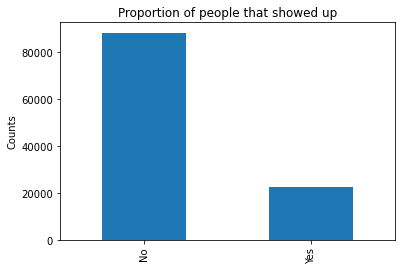

In [274]:
#Here we visualize the counts of people that showed up for their appoinment to the counts that did not show up.
#We also see the proportion of people that showed up
df_show=df_1["No_show"].value_counts()
plot_bar(df_show, 'Counts', 'Proportion of people that showed up')
DEF=df_1["No_show"].value_counts()
SUM=DEF.sum()
df_1_No_prop=DEF[0]/SUM
df_1_No_prop

0.6499737618297957

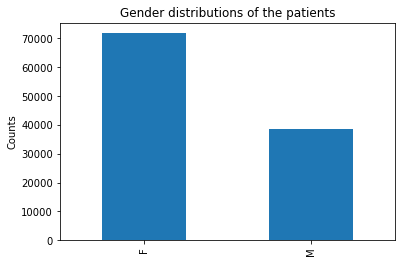

In [275]:
#Here we visualize the counts of gender of the people that booked for an appointment.
#We also see the proportion of Females to males.
df_gender=df_1["Gender"].value_counts()
plot_bar(df_gender, 'Counts','Gender distributions of the patients')
DEF1=df_1["Gender"].value_counts()
SUM1=DEF1.sum()
df_1_F_prop=DEF1[0]/SUM1
df_1_F_prop

##### Observations
> From the exploration we oberved the folowings:
 
 >1. There are very few people with scholarships, diabetes, hypertension, handicap or Alcoholism.
 
 >2. About 80% of the patients showed up for their appointment.
 
 >3. About 65% of the the patients that book an appoinment were female.
 
 Next we look at the statistics of the Patient with respects to the age, gender, diseases like hypertension, diabetese and Alcolism.

In [276]:
#Average age of the Genders that showed up
Average_age=df_1.groupby(['Gender'])[['Age']].mean()
Average_age

,Age
Gender,
F,38.894542
M,33.736863


This shows that the average age of women that booked an appointment is 39 while that of men is around 34 year of age.

In [277]:
#Lets see the deviation of the Age of all the patients gender
Std_age=df_1.groupby(['Gender'])[['Age']].std()
Std_age

,Age
Gender,
F,22.154889
M,24.435221


In [278]:
#Maximum age of male and female patient
Max_age=df_1.groupby(['Gender'])[['Age']].max()
Max_age

,Age
Gender,
F,115
M,100


In [279]:
#Minimum age of male and female patient
Min_age=df_1.groupby(['Gender'])[['Age']].min()
Min_age

,Age
Gender,
F,0
M,0


The standard deviation of both gender are as high as 22 for females and 24 for males. This shows that the age distribution is spread out from young with age of 0 for both gender to oldest with the age of 115 for the female and 100 for the male.

 Next we investigate the average, standard deviation maximum and minumum age of the patient with Hypertension, dieabetes, Alcoholism and Handicapped. For this we define a fuction Statt that takes the desired feature df as an input and outputs the mean, standard deviation, minimum and maximum values.

In [280]:
#defining function Statt
def Statt(df):
    output={} # A dictionary to store the outputs
    Average= df.mean() #Calculate the mean
    Std=df.std()       #Calculate the standard deviation
    Minimum=df.min()   #Calculate the minimum value
    Maximum=df.max()   #calculate the maximum value
    output=("mean:", Average, "Standard deviation:", Std, "Min:", Minimum, "Max:", Maximum) # store the result to output
    return output      #Return output to the screen

In [281]:
#Next we see the mean, standard deviation, min and max age of people with Hypertension
Statt_hypertension=df_1.groupby(['Hipertension'])[['Age']]
Statt(Statt_hypertension)

('mean:',
                     Age
 Hipertension           
 0             31.308943
 1             60.613596,
 'Standard deviation:',
                     Age
 Hipertension           
 0             21.171609
 1             13.929756,
 'Min:',
               Age
 Hipertension     
 0               0
 1               4,
 'Max:',
               Age
 Hipertension     
 0             115
 1             115)

From the above we observe that averagely, Hypertension is more among the older patients, with a mean age of 60years,  the standard deviation of those with hypertension is lower showing a low spread out of the disease. The minimum age of the hypertensive patient is 4years and maximum is 115.  

In [282]:
#Next we see the mean, standard deviation, min and max age of people with Diabetes
Statt_Diabetes=df_1.groupby(['Diabetes'])[['Age']]
Statt(Statt_Diabetes)

('mean:',
                 Age
 Diabetes           
 0         35.208962
 1         61.372529,
 'Standard deviation:',
                 Age
 Diabetes           
 0         22.625604
 1         13.597400,
 'Min:',
           Age
 Diabetes     
 0           0
 1           1,
 'Max:',
           Age
 Diabetes     
 0         115
 1          99)

From the above we observe that averagely, Diabetes is more among the older patients, with a mean age of 61years, the standard deviation of those with hypertension is lower showing a low spread out of the disease. The minimum age of the diabetic patient is 1year and maximum is 99years.

In [283]:
#Next we see the mean, standard deviation, min and max age of people with Alcoholism
Statt_Alcoholism=df_1.groupby(['Alcoholism'])[['Age']]
Statt(Statt_Alcoholism)

('mean:',
                   Age
 Alcoholism           
 0           36.697161
 1           49.593750,
 'Standard deviation:',
                   Age
 Alcoholism           
 0           23.252967
 1           12.707679,
 'Min:',
             Age
 Alcoholism     
 0             0
 1             4,
 'Max:',
             Age
 Alcoholism     
 0           115
 1            85)

From the above we observe that averagely, Alcoholism is more among the medium aged patients, with a mean age of 49years, the standard deviation of those with hypertension is lower showing a low spread out of the disease. The minimum age of the Alcoholism patient is 4years and maximum is 85years.

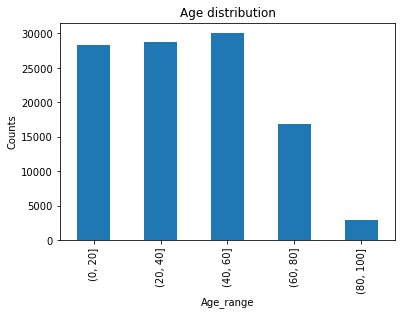

In [284]:
#Using our plot_bar function to visualize the age distributions of the all the patients
df_1['Age_range']=pd.cut(x=df_1['Age'], bins=[0, 20, 40, 60, 80, 100])
df2 = df_1.groupby('Age_range').Age_range.count()
plot_bar(df2,"Counts", "Age distribution")


We can observe that there are more patients within the age of 40 to 60 in this dataset.


### Research Question 1 (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

#### (a) Do people with at least one of these charachteristics like Hypertension, Diabetes, Alcoholism, scholarship, sms-recieved or Handicap likely to show up more ?

In [285]:
#The classifications of those who showed up and those who did not
df_show = df_1.query('No_show=="No"')
df_no_show=df_1.query('No_show=="Yes"')

Text(0.5, 1.0, 'Patients with special Characteristics')

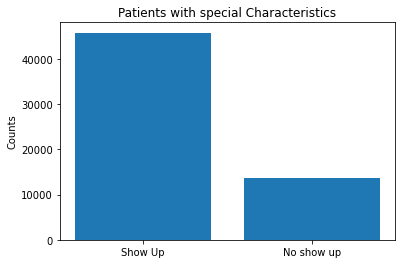

In [286]:
#Lets get the data frame of people with at least Hypertension, Diabetes, Alcoholism,
#scholarship, sms-recieved or Handicap
df_char=df_show.query(
    'Hipertension==1 or Scholarship==1 or Alcoholism==1 or Diabetes==1 or Handcap>=1 or SMS_received==1')
df_no_char=df_no_show.query(
    'Hipertension==1 or Scholarship==1 or Alcoholism==1 or Diabetes==1 or Handcap>=1 or SMS_received==1')
plt.bar(["Show Up", "No show up"], [df_char.shape[0],df_no_char.shape[0]])
plt.ylabel('Counts')
plt.title('Patients with special Characteristics')

From the bar plot, we see that people who have at least one of the followings:
1. Hypertention
2. Scolarship
3. Alcoholism
4. Diabetes
5. Those who are handicap
6. or those who recieved SMS, 
 
 
 are more likely to show up than not.

#### (b) Does gender determine if a person will show up or not? And if women with alcoholism is likely to show up for and appointment than men with alcoholism.

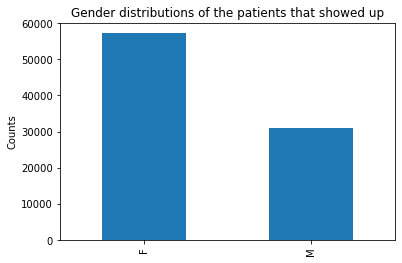

In [287]:
#Lets first see the gender distribution of the people that showed up for their appointment.
df_show_G=df_show['Gender'].value_counts()
plot_bar(df_show_G, 'Counts', 'Gender distributions of the patients that showed up')

From the plot, we observed that more females showed up campared to the male gender. This is quite logical since more females booked for an appointment compared to the male gender. Hence we find and compare the proportions of female who booked an appointment and actually showed as well as proportion of male who booked and showed up for their appoinment.

In [288]:
#First we find the proportion of females who booked and showed up
df_tot_F=df_1.query('Gender=="F"')["Gender"].value_counts()
df_FEM_SHOW=df_show.query('Gender=="F"')["Gender"].value_counts()
df_F_prop=(df_FEM_SHOW/df_tot_F).sum()
print("The proportion of females that booked an appointment and showed up are", df_F_prop)

The proportion of females that booked an appointment and showed up are 0.7968512924734475


In [289]:
#Here we find the proportion of male that booked and showed up
df_tot_M=df_1.query('Gender=="M"')["Gender"].value_counts()
df_MAL_SHOW=df_show.query('Gender=="M"')["Gender"].value_counts()
df_M_prop=(df_MAL_SHOW/df_tot_M).sum()
print("The proportion of Males that booked an appointment and showed up are", df_M_prop)

The proportion of Males that booked an appointment and showed up are 0.8003205211052808


Text(0.5, 1.0, 'Proportions of male and females that showed up')

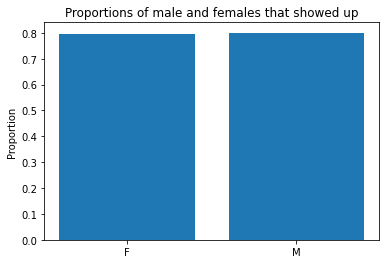

In [290]:
#We use bar chart to visualize the the two gender proportions that booked and showed up
plt.bar(["F", "M"], [df_F_prop,df_M_prop])
plt.ylabel('Proportion')
plt.title('Proportions of male and females that showed up')

From the barchart above, we observe that the proportion of the females that booked and showed up is almost thesame to that of the males that booked and showed up. Hence, from the dataset, we cannot deduce that a gender type is likely to show up for an appointment compared to another.

Now lets investigate the proportion of each gender with alchohol who showed up.

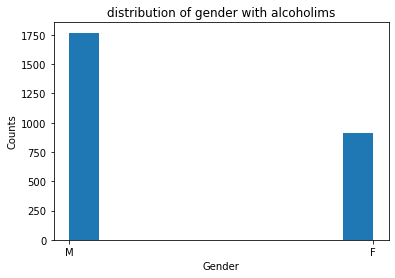

In [291]:
#Lets see the distribution of gender with alcoholims
df_Alcoholism_Gender=df_show.query('Alcoholism==1')["Gender"]
fig, ax=plt.subplots()
plot_hist(ax, df_Alcoholism_Gender, 'Gender', 'Counts','distribution of gender with alcoholims')

We see from the distribution that there are more males with alcoholism than female, lets now see which is likely to show up for an appoinment.

In [292]:
#Lets first of all see the proportion of female with alcoholism who showed up 
df_Alcoh_Fem=df_1.query('Alcoholism==1 and Gender=="F"')["Gender"].value_counts().sum()
df_Alcoh_Fem_show=df_show.query('Alcoholism==1 and Gender=="F"')["Gender"].value_counts().sum()
Prop_F=df_Alcoh_Fem_show/df_Alcoh_Fem
Prop_F

0.7481602616516762

In [293]:
#Then lets see the proportion of male with alcoholism who showed up 
df_Alcoh_mal=df_1.query('Alcoholism==1 and Gender=="M"')["Gender"].value_counts().sum()
df_Alcoh_mal_show=df_show.query('Alcoholism==1 and Gender=="M"')["Gender"].value_counts().sum()
Prop_M=df_Alcoh_mal_show/df_Alcoh_mal
Prop_M

0.827328029948526

Text(0.5, 1.0, 'Proportion of male to female with alcoholism who showed up ')

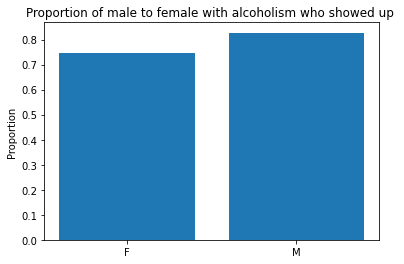

In [294]:
plt.bar(["F", "M"], [Prop_F,Prop_M])
plt.ylabel('Proportion')
plt.title('Proportion of male to female with alcoholism who showed up ')

From the plot above, we see that men are slightly more likely to show up for an appoinment than womwn with alcoholism

<a id='conclusions'></a>
## Conclusions

This analysis investigates the No-show appointment data which collected from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. We set some goals in our analysis which were to use exploratory data analysis to investigate the following questions:

>**Question:** What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? We are going to break this questions into components.
 
>(a) Do people with at least one of these characteristics like Hypertension, Diabetes, Alcoholism, Handicap, scholarship, sms_recieved likely to show up more ?

>(b) Does gender determine if a person will show up or not? And if women with alcoholism is likely to show up for and appointment than men.

The analysis done in this work shows that some factors such as patient who atleast have diseases like Hypertension, Diabetes, Alcoholism or patient who are Handicap are very likely to show up for their appointment than not. Also, Patients who have scholarships and or recieved sms reminder are likely to show up than not.

The work also investigated to know if the gender of a patient is factor that can determine if a patient will show up on not and if women with alcohol are more likely to show up for appointment than male with alcohol.  

The exploration shows that the gender does not determine wether a patient will show up or not as the proportion of women that showed up for their appointment were very similar to the proportions of males that showed up for their appointment. Furthermore, men with alcohol are slightly more likely to show up than women. 

Statistical analysis shows that at an average diseases like hypertension, diabetese and Alcoholism are more common among the old folks with average age of 60, 61 and 49 respectively. 

#### Limitation
All the analysis carried out and conclusions are solely based on the dataset. No machine learning models were carried out.